# Analysis of the Ca8452 line

In [1]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as f
import sunpy
from matplotlib import transforms
from scipy.io import readsav
from ISPy.io import solarnet
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi3 as un
from importlib import reload
from PIL import Image
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


# functies uittesten met CaIR

In [3]:
folder_path = "E:/solar flares/data/2015-09-27/"
file_n="fits/crispex.8542.10_34_29.stokesI.icube"

from ISPy.io import lapalma as lp

#######################################################
# The number of wavelenghts are apriori unknown execpt if not in the icube so ...
number_wavelenghts = 21
# which is an assuption which we will check

cube = lp.read(file_n , 21)
print(cube.shape)
number_of_frames = cube.shape[0]

def timeframe_to_filename_fits(frame):
    if frame <0 or frame >= number_of_frames:
        raise IndexError(f'frame number {frame} is not in (0, {number_of_frames}).')
    return folder_path + file_n
    
ttff = timeframe_to_filename_fits


def alternative_datacube(timeframe):
    if timeframe >= number_of_frames or timeframe < 0:
        raise IndexError(f"Timeframe {timeframe} is negative or exeeds numer of frames {number_of_frames}.")
    return cube[timeframe, 0]


(47, 1, 21, 957, 968)


In [4]:
tseries = rs( "tseries.8542.103429.calib.sav")
tseries


{'tstep': 6,
 'clip': array([12,  4,  2,  1], dtype='>i2'),
 'tile': array([ 6,  8, 14, 24], dtype='>i2'),
 'scale': 16.891891,
 'ang': array([ 0.02397558,  0.02290806,  0.02184264,  0.02077999,  0.01971938,
         0.01866133,  0.01760626,  0.01655051,  0.01549687,  0.01444594,
         0.01339666,  0.01235133,  0.01130783,  0.01026897,  0.00923236,
         0.00819818,  0.00716443,  0.00613354,  0.00510588,  0.00407826,
         0.00305308,  0.00203395,  0.00101579,  0.        , -0.00101457,
        -0.00202678, -0.0030373 , -0.00404258, -0.0050453 , -0.00604627,
        -0.007043  , -0.00803921, -0.00903239, -0.0100206 , -0.01100856,
        -0.01199151, -0.01297069, -0.01394776, -0.01492336, -0.01589504,
        -0.01686508, -0.01783037, -0.01879359, -0.01975422, -0.02071248,
        -0.0216652 , -0.02261698], dtype='>f8'),
 'shift': array([[ 4.58648466, -2.8170809 ],
        [ 4.3865073 , -2.53915145],
        [ 4.18530591, -2.57130913],
        [ 3.88779837, -2.43169094],
      

In [5]:
tseries['shift']

array([[ 4.58648466, -2.8170809 ],
       [ 4.3865073 , -2.53915145],
       [ 4.18530591, -2.57130913],
       [ 3.88779837, -2.43169094],
       [ 3.35318942, -2.30902734],
       [ 3.02100999, -2.07217794],
       [ 2.59803708, -2.00267693],
       [ 2.55629039, -2.12424349],
       [ 2.15729241, -1.76739315],
       [ 1.54899599, -1.69025597],
       [ 1.3625288 , -1.70713829],
       [ 0.95109507, -1.32217084],
       [ 0.64265575, -1.16603019],
       [ 0.46767971, -0.99038961],
       [ 0.        , -0.6422553 ],
       [ 0.02172587, -0.74788484],
       [-0.53166339, -0.80827949],
       [-0.46277069, -0.71598849],
       [-0.71082987, -0.41625044],
       [-1.20576898, -0.72985715],
       [-1.45264362, -0.45774946],
       [-1.9761075 , -0.24918529],
       [-2.07285507, -0.02073259],
       [-2.23988368,  0.        ],
       [-2.31289409,  0.22023686],
       [-2.09528717,  0.20493866],
       [-2.30103655,  0.42085437],
       [-2.09109067,  0.46616027],
       [-2.2049645 ,

In [6]:
time_list = tseries["time"]
print(time_list, [t.decode("utf-8") for t in time_list])

[b'10:34:37.966' b'10:35:10.238' b'10:35:42.511' b'10:36:14.766'
 b'10:36:47.025' b'10:37:19.273' b'10:37:51.498' b'10:38:23.812'
 b'10:38:56.131' b'10:39:28.437' b'10:40:00.763' b'10:40:33.039'
 b'10:41:05.331' b'10:41:37.552' b'10:42:09.777' b'10:42:42.001'
 b'10:43:14.287' b'10:43:46.560' b'10:44:18.809' b'10:44:51.135'
 b'10:45:23.463' b'10:45:55.680' b'10:46:27.947' b'10:47:00.220'
 b'10:47:32.537' b'10:48:04.862' b'10:48:37.218' b'10:49:09.491'
 b'10:49:41.768' b'10:50:14.076' b'10:50:46.335' b'10:51:18.666'
 b'10:51:50.989' b'10:52:23.241' b'10:52:55.577' b'10:53:27.842'
 b'10:54:00.077' b'10:54:32.337' b'10:55:04.645' b'10:55:36.920'
 b'10:56:09.239' b'10:56:41.499' b'10:57:13.790' b'10:57:46.096'
 b'10:58:18.425' b'10:58:50.671' b'10:59:22.990'] ['10:34:37.966', '10:35:10.238', '10:35:42.511', '10:36:14.766', '10:36:47.025', '10:37:19.273', '10:37:51.498', '10:38:23.812', '10:38:56.131', '10:39:28.437', '10:40:00.763', '10:40:33.039', '10:41:05.331', '10:41:37.552', '10:42:09.

In [7]:
zeros = [np.array(alternative_datacube(0)[:, 920, 0])]
alternative_datacube(0).shape, zeros

((21, 957, 968),
 [array([221, 185, 176, 169, 159, 148, 137, 123, 109,  99,  95,  98, 108,
         121, 136, 148, 162, 173, 181, 192, 225], dtype=int16)])

In [8]:
import use_nessi as un1
reload(un1)
un1.conv_time_wav('CaIR15a', do_time=False)

the wavelengts are [8540.3844825 8541.1894825 8541.3994825 8541.5394825 8541.6794825
 8541.7844825 8541.8544825 8541.9244825 8541.9944825 8542.0644825
 8542.1344825 8542.2044825 8542.2744825 8542.3444825 8542.4144825
 8542.4844825 8542.5894825 8542.7294825 8542.8694825 8543.0794825
 8543.8844825]


['line_data/wav_sstCaIR15a.npy']

E:/solar flares/data/2015-09-27/fits/crispex.8542.10_34_29.stokesI.icube
the shape of the data is (47, 1, 21, 957, 968)
the wavelengths are self._wavel = array([8540.3844825, 8541.1894825, 8541.3994825, 8541.5394825,
       8541.6794825, 8541.7844825, 8541.8544825, 8541.9244825,
       8541.9944825, 8542.0644825, 8542.1344825, 8542.2044825,
       8542.2744825, 8542.3444825, 8542.4144825, 8542.4844825,
       8542.5894825, 8542.7294825, 8542.8694825, 8543.0794825,
       8543.8844825])
(957, 968) (957, 968)
Boundary
Blue=Outside, yellow=Inside


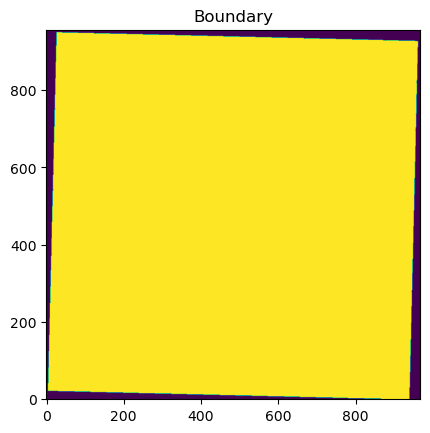

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


([array([221, 185, 176, 169, 159, 148, 137, 123, 109,  99,  95,  98, 108,
         121, 136, 148, 162, 173, 181, 192, 225], dtype=int16)],
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]))

In [9]:
reload(un)
CaIR = un.SST_data_from_multiple_fits_files(
    timeframe_to_filename_fits,
    spectfilename="line_data\\wav_sstCaIR15a.npy", 
    number_of_frames=number_of_frames,
    time=time_list, 
    name_of_line='CaIR15a', 
    thresh=[0, np.percentile(alternative_datacube(0), 95)],  
    boundary_methode='search', 
    boundary_arguments = {"error":0.0001,  "zeros":zeros}, #"index_of_zero":[],
    alternative_datacube=alternative_datacube, 
    with_stokes=False,
    with_time=True,
    shape = (47, 1, 21, 957, 968), 
    cont_point=None
)
# (self, timeframe_to_filename_fits, spectfilename, number_of_frames, time, name_of_line,
#                  thresh=[1e-10,2e-7], boundary_methode='search', alternative_datacube=None,
#                  boundary_arguments=None, cont_point=None, with_stokes=False, with_time=False
# CaIR.datacube
# np.shape(CaIR.datacube), CaIR.datacube(0)[0:30:5,10:20:5, 100:200:30], 
zeros, CaIR.boundary[::100, ::100]

In [10]:
# CaIR.calculate__FOV_spect_over_time()


In [11]:
secs = un.get_TIME(CaIR)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")
print(f'{CaIR.shape=}')

Not official start flare defined for CaIR15a falling back to first of TIME[0], the execpt_time b'10:34:37.966'.
the mean cadence is 32.28260869565217 for this line!
CaIR.shape=(47, 1, 21, 957, 968)


21
[[3.0, 2.625], [10.0, 2.625], [17.0, 2.625]] 21


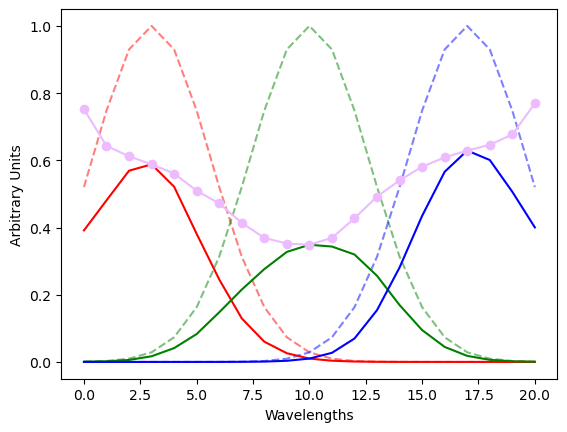

In [12]:
# %matplotlib inline
print(len(CaIR._wavel))
Meansd = un.guess_filters(len(CaIR._wavel))
Meansd = un.guess_filters(len(CaIR._wavel))
print(Meansd,len(CaIR._wavel) )
CaIR.update_filters(Meansd)
CaIR.plot_filt(880,900)

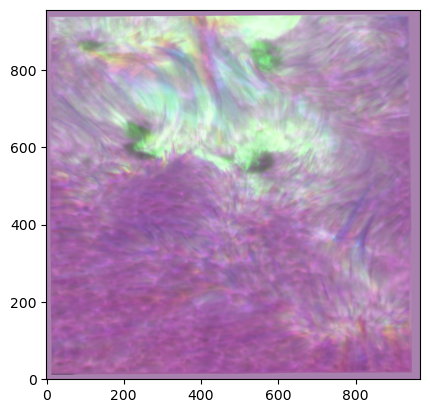

In [13]:
# %matplotlib inline

CaIR.ccp_frame(30,Show=False)
CaIR.thresh=[1e-7,2e-5]
plt.imshow(CaIR.current_ccp[:,:], origin='lower')
# plt.imshow(CaIR.boundary[::-1,:], alpha=0.2)
plt.show()

#interesting pixel: (1030, 975)

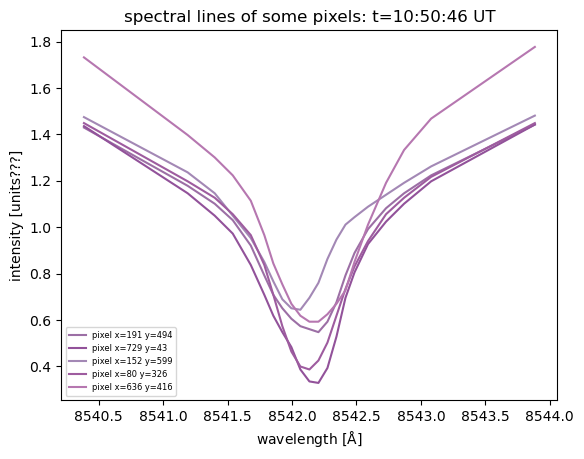

In [14]:
CaIR.interesting_pixels( frame=30, pixels=[(600, 600)], rand=True, numb=5)

COCOPLOT at  t=10:34:37 UT (frame number 0 )


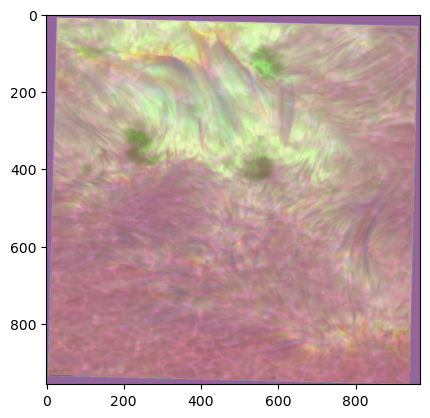

COCOPLOT at  t=10:56:09 UT (frame number 40 )


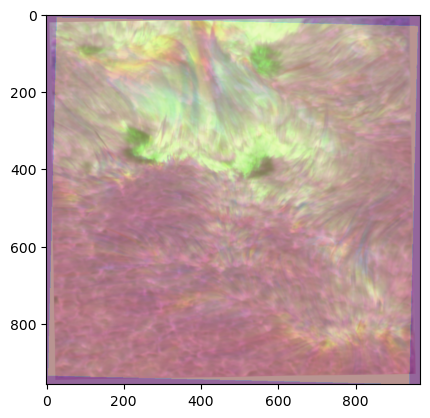

In [15]:
# Many COCOPLOTS
r = CaIR._number_of_frames
for i in range(0,r,40):
    tstr = CaIR.time_of_frame(i)
    print("COCOPLOT at ", tstr, "(frame number", i,")")
    CaIR.ccp_frame(i,Show=False)
    plt.imshow(CaIR.current_ccp[::-1,:])

    plt.imshow(CaIR.boundary[::-1,:], alpha=0.2)
    plt.show()


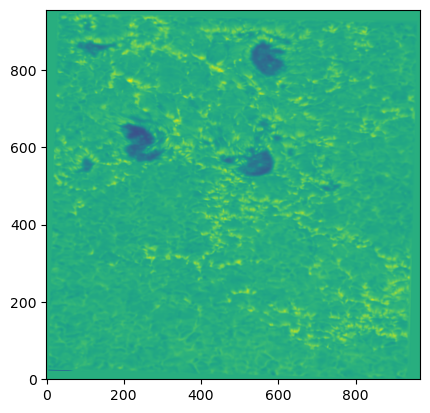

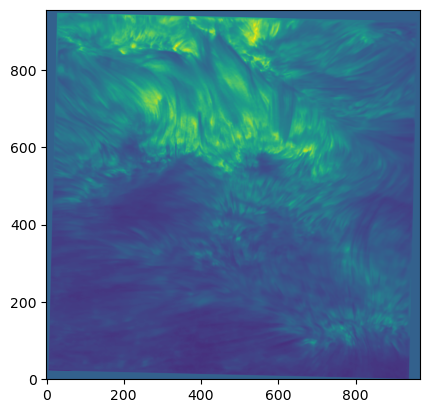

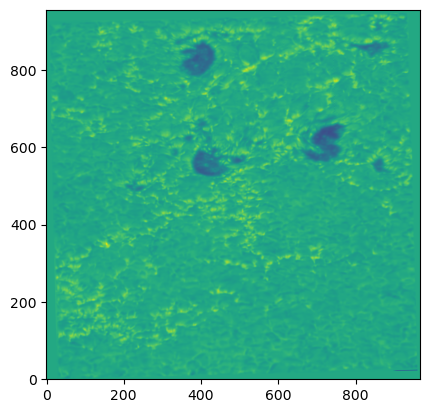

In [16]:
plt.imshow(CaIR.datacube(0)[0], origin='lower')
plt.show()
plt.imshow(CaIR.datacube(0)[10], origin='lower')
plt.show()
plt.imshow(CaIR.datacube(0)[20][:, ::-1], origin='lower')
plt.show()

COCOPLOT at  t=10:45:23 UT (frame number 20 )


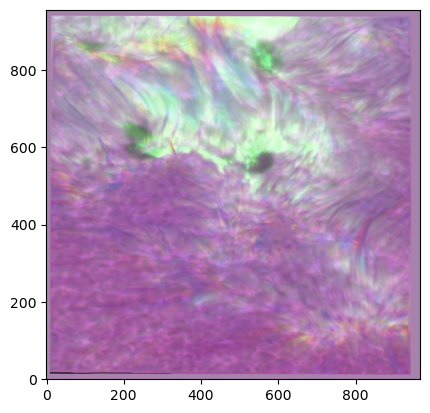

In [17]:
CaIR.ccp_frame(20)
pixels=[[30,60],[631,646],[194,268],[298,323],[472,204]]
# CaIR.current_ccp[0:30:5,0:60:5,:]

In [18]:
CaIR.calculate__FOV_spect_over_time()


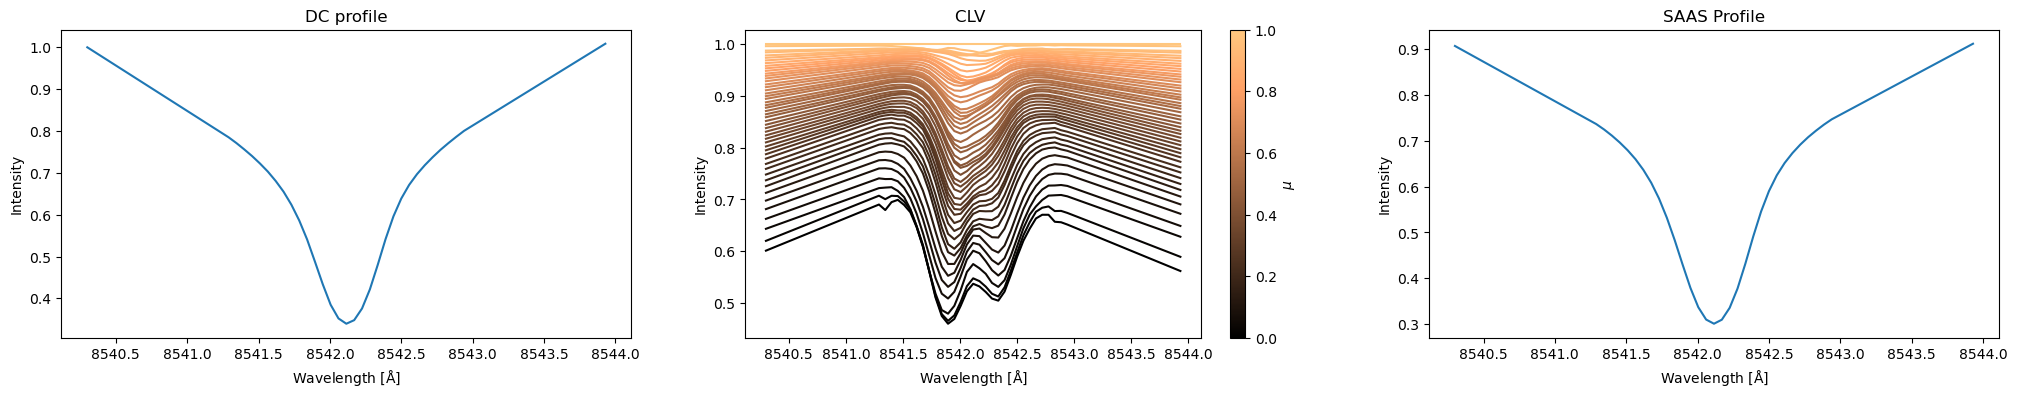

In [19]:
reload(un)
theor_CaIR = un.linestudier("E:/solar flares/data/2017-09-06/fits/8542_clv.fits", nr=101)


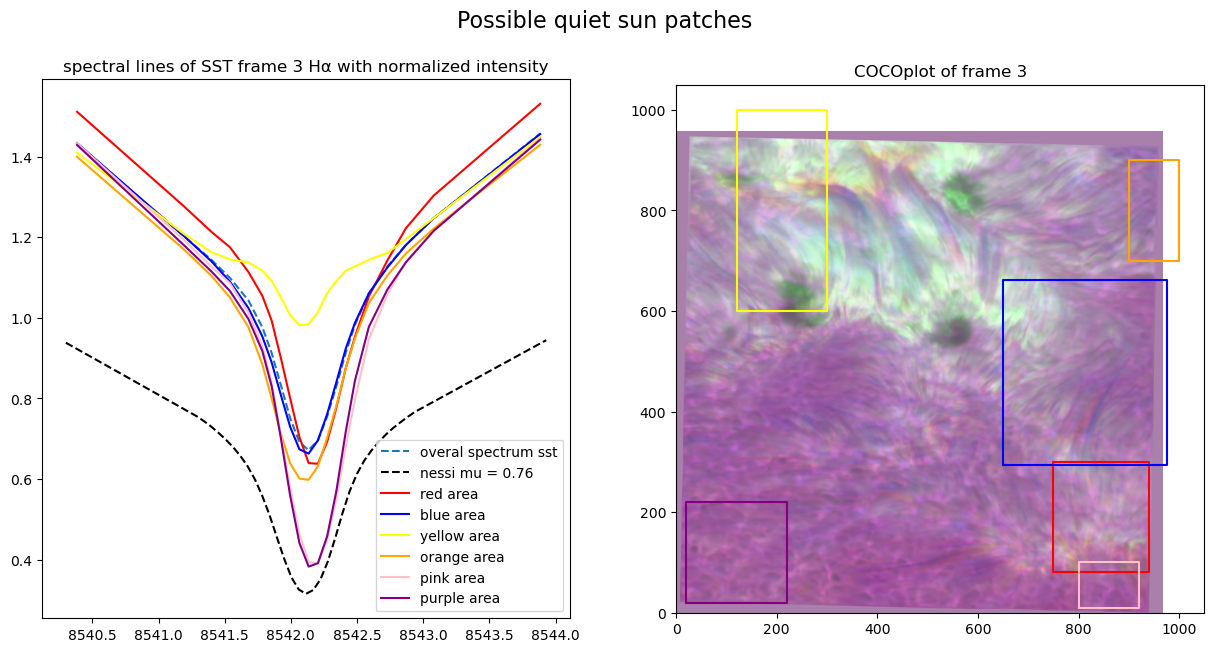

In [20]:
# %matplotlib widget
# %matplotlib inline
frame = 3

X = [[(750,940), (80,300)], [(650,975), (294,662)],[(120,300), (600,1000)], [(900, 1000), (700, 900)], [(800,920), (10,100)] 
     , [(20,220), (20,220)]]

CaIR.possible_quiet_sun_patches(frame, theor_line = theor_CaIR, X=X)

In [21]:
# the chosen quiet sun patch is 
color_wanted_patch = "purple"

# choose from
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']

the edges of the patch are denoted by the xlim: (20, 220) and ylim: (20, 220)


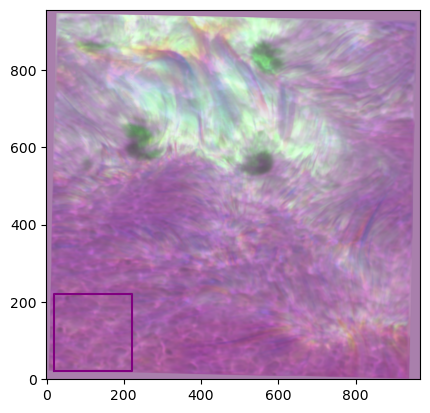

In [22]:
ind = int(colors.index(color_wanted_patch))

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
CaIR.set_quiet_sun(frame, xlim, ylim, show=False, color=color_wanted_patch)

## Finding $\mu$

In [23]:
def timeframe_to_extent(frame, timeframe_to_filename_fits, flip=False, invert=False, shift=(0,0)):
    position  =  (775, -233)

    width = 60
    fyp = [position[1] - width / 2, position[1] + width / 2 ]
    return [position[0] - width / 2, position[0] + width / 2, *fyp]

def extent2mid(extent):
    return ((extent[0]+extent[1])/2, (extent[2]+extent[3])/2)

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def local_rotation(extent, rad_rot):
    mid = extent2mid(extent)
    x = np.array(mid) 
    R = np.array([[np.cos(rad_rot), -np.sin(rad_rot)], [np.sin(rad_rot), np.cos(rad_rot)]])
    y = np.dot(R, x)
    t = x-y

    return transforms.Affine2D().rotate_deg(rad_rot/np.pi*180).translate(t[0], t[1])

def square_full_mu_mesh(X,Y, angle, num=200):
    X = np.array([np.min(X), np.max(X)])
    Y = np.array([np.min(Y), np.max(Y)])
    X,Y = np.meshgrid(X,Y)
    X,Y = rotate_mesh_around_average(X,Y, angle)
    X = np.linspace(np.min(X), np.max(X), num)
    Y = np.linspace(np.min(Y), np.max(Y), num)
    X,Y = np.meshgrid(X,Y)
    MU = calculate_mu(X,Y)
    return MU, X, Y

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name="", rotate=0):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        tr = local_rotation(extent, rotate)
        ax.imshow(Image.fromarray(over.current_ccp), transform=tr + ax.transData, origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    MU_, X, Y = square_full_mu_mesh(X,Y, angle=0, num=200)
    CS = ax.contour(X, Y, MU_)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        X, Y, _ = extent_to_grid(extent, (0,0,0,2,2), invert=False, angle=0)
        print(X,Y)
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp, rotate)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.5024904337922592 for timeframe 0
does MU contain nan's? False
[[745. 805.]
 [745. 805.]] [[-263. -263.]
 [-203. -203.]]
Coundourplot succesfully saved.


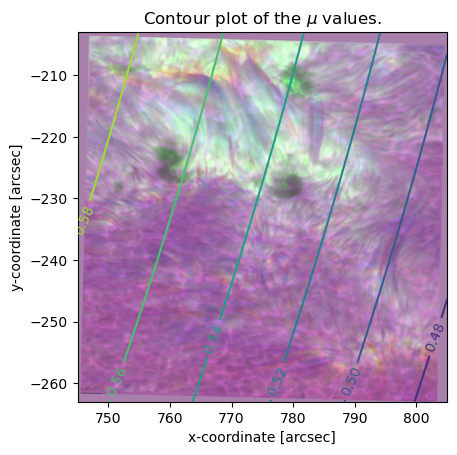

In [24]:


angle = 0
frame = 0    
position  =  (775, -233)

width = 60
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fyp = [position[0] - width / 2, position[0] + width / 2, *fyp]
extent = fyp
xx, yy, MU = extent_to_grid(extent, CaIR.shape, invert=False, angle=angle)
xx0=xx
yy0=yy

mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=CaIR,
    save=True,
    save_name=CaIR.name_of_line,
    timeFrame=frame,
    rotate=angle
)
sst_data = CaIR
theor_line = theor_CaIR
set_mu(CaIR, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaIR.index_mu], theor_line.sst_clv[theor_CaIR.index_mu][0], clv_fit(mu, theor_line)


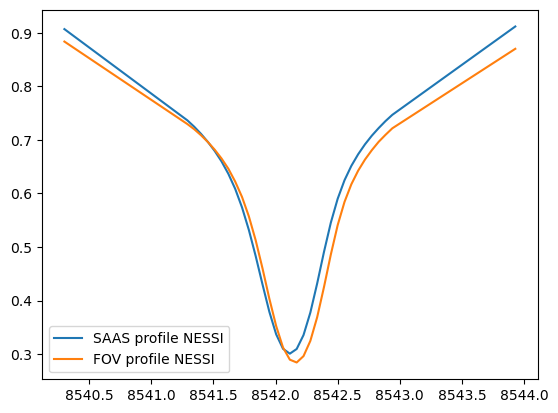

In [25]:
theor_CaIR.set_fov( xx, yy, CaIR.boundary, sr=959.63)

the edges of the patch are denoted by the xlim: (20, 220) and ylim: (20, 220)


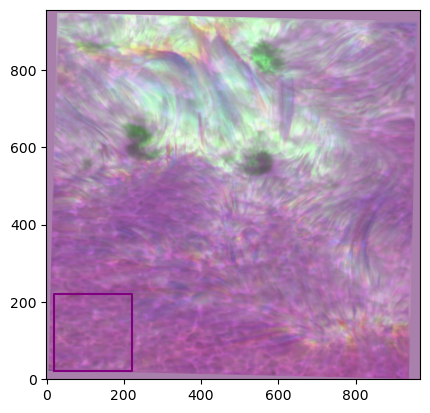

The quiet sun is pick at x (752.4146845915201, -255.49999999999997) with average              mu 0.5606691853548946
[[0.77763404 0.7776987  0.77776335 ... 0.79037163 0.79043628 0.79050094]
 [0.77763404 0.7776987  0.77776335 ... 0.79037163 0.79043628 0.79050094]
 [0.77763404 0.7776987  0.77776335 ... 0.79037163 0.79043628 0.79050094]
 ...
 [0.77763404 0.7776987  0.77776335 ... 0.79037163 0.79043628 0.79050094]
 [0.77763404 0.7776987  0.77776335 ... 0.79037163 0.79043628 0.79050094]
 [0.77763404 0.7776987  0.77776335 ... 0.79037163 0.79043628 0.79050094]] [[-0.27275593 -0.27275593 -0.27275593 ... -0.27275593 -0.27275593
  -0.27275593]
 [-0.27269052 -0.27269052 -0.27269052 ... -0.27269052 -0.27269052
  -0.27269052]
 [-0.27262512 -0.27262512 -0.27262512 ... -0.27262512 -0.27262512
  -0.27262512]
 ...
 [-0.25987178 -0.25987178 -0.25987178 ... -0.25987178 -0.25987178
  -0.25987178]
 [-0.25980637 -0.25980637 -0.25980637 ... -0.25980637 -0.25980637
  -0.25980637]
 [-0.25974097 -0.25974097 -0.2

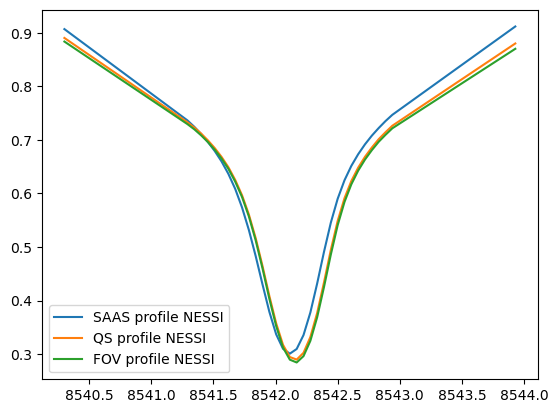

{'frame': 0, 'xlim': (20, 220), 'ylim': (20, 220), 'color': 'purple'}

In [26]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
reload(un)
CaIR.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_CaIR.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaIR.quiet_sun

[8540.3844825 8541.1894825 8541.3994825 8541.5394825 8541.6794825
 8541.7844825 8541.8544825 8541.9244825 8541.9944825 8542.0644825
 8542.1344825 8542.2044825 8542.2744825 8542.3444825 8542.4144825
 8542.4844825 8542.5894825 8542.7294825 8542.8694825 8543.0794825
 8543.8844825] [1.42156548 1.16865623 1.10852968 1.05555992 0.98614983 0.90264642
 0.81218023 0.67510666 0.53303107 0.42312304 0.37941364 0.39755485
 0.46552071 0.57963603 0.71913743 0.84734414 0.9650121  1.06157565
 1.1259776  1.21694468 1.43123335] [0.87709666 0.74901037 0.71215662 0.67602551 0.62305197 0.56106238
 0.50273326 0.43439215 0.36706461 0.31534501 0.29278245 0.29766583
 0.32884035 0.38683441 0.46116209 0.53358075 0.61139012 0.67159246
 0.71074604 0.74821401 0.87317426]
[0.01960455 1.51790388]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 730.604615665985
        x: [ 2.555e-13  1.552e+00]
      nit: 9
      jac: [ 7.629e-06  1.526e-05]
 hess_inv: 

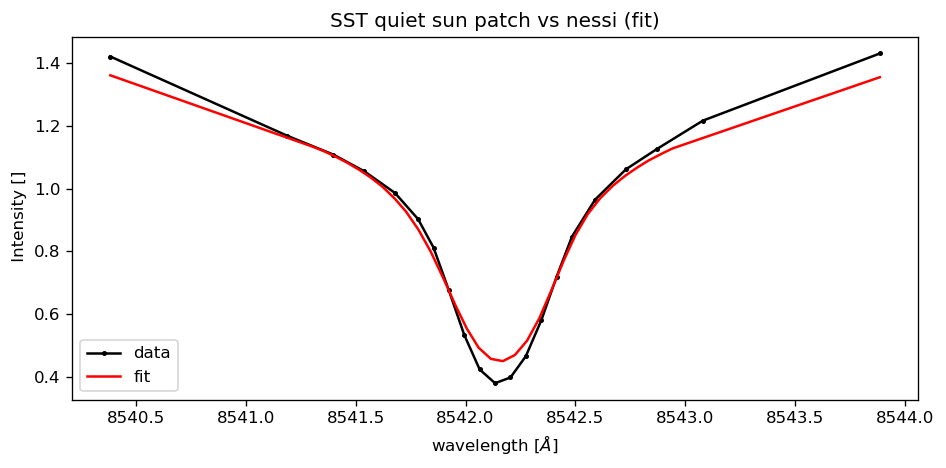

de p-waarde is  0.005194811650183099 
Chi^2 reduced= 38.45287450873605 
aantal vrijheidgraden= 19 
chi^2= 730.604615665985
we behouden de fit tot op een betrouwbaarheidsniveau van  0.005194811650183099 
Oftewel verwerp als p-waarde <lpha-niveau 


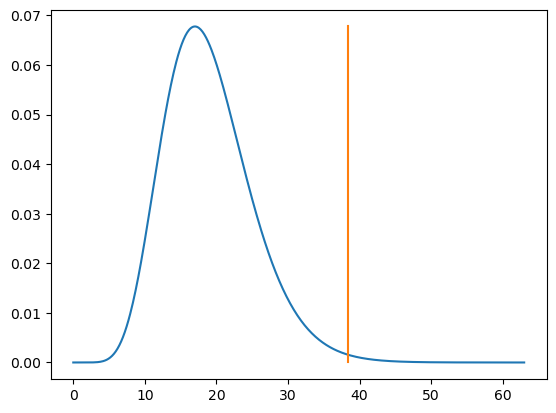

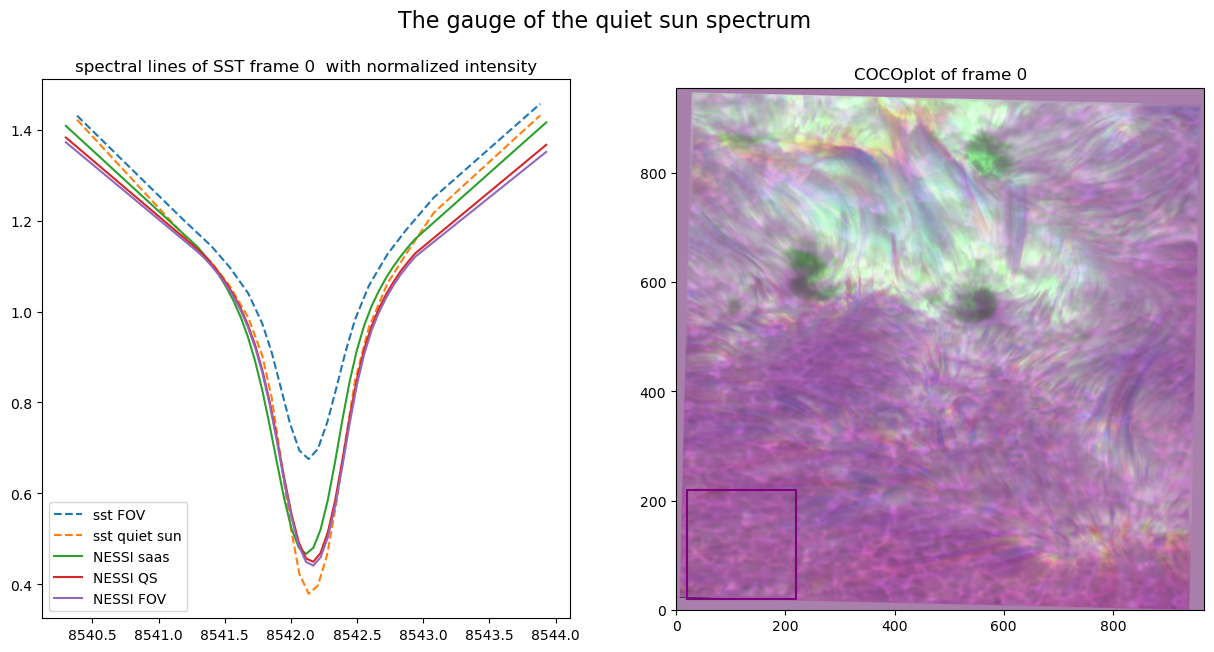

In [27]:
reload(un)
un.fit_qs_to_NESSI(theor_CaIR, CaIR)

E:\solar flares/data/2017-09-06\use_nessi3.py:1732: RuntimeWarning: divide by zero encountered in scalar divide
  return np.nanstd(np.sum(self.datacube(frame)[(wav<= interval[1]) &
E:\solar flares/data/2017-09-06\use_nessi3.py:1723: RuntimeWarning: invalid value encountered in scalar divide
  std = integral / l_interv / appr_num**0.5
E:\solar flares/data/2017-09-06\use_nessi3.py:1720: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral,_ = scipy.integrate.quad(stc, interval[0], interval[1])
E:\solar flares/data/2017-09-06\use_nessi3.py:1720: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain fro

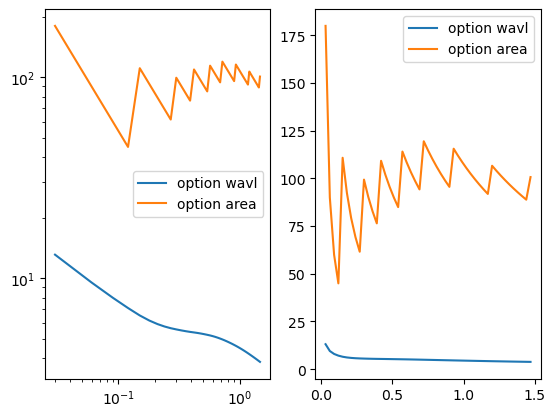

STD_Area = array([359.68302644, 179.84151322,  89.9207566 ,  59.94717107,
        44.9603783 , 110.75059302,  92.29216085,  79.10756644,
        69.21912064,  61.52810723,  99.30455249,  90.2768659 ,
        82.75379374,  76.3881173 , 109.17155425, 101.89345063,
        95.52510997,  89.90598585,  84.91120886, 114.00553474,
       108.305258  , 103.14786476,  98.45932546,  94.17848522,
       119.39281983, 114.61710704, 110.20875677, 106.12695096,
       102.33670272,  98.8078509 ,  95.51425587, 115.4965251 ,
       111.88725869, 108.4967357 , 105.30565524, 102.29692223,
        99.45534106,  96.76735887,  94.22084942,  91.80493021,
       106.56647412, 103.96729183, 101.49188012,  99.13160384,
        96.87861284,  94.72575478,  92.66649924,  90.69487159,
        88.8053951 , 100.63419702]), STD_Wavl = array([ 0.        , 13.08908046,  9.51867945,  7.98695432,  7.1030879 ,
        6.52375227,  6.15274037,  5.91087798,  5.74839827,  5.63806238,
        5.56046133,  5.49755411,  5.44609

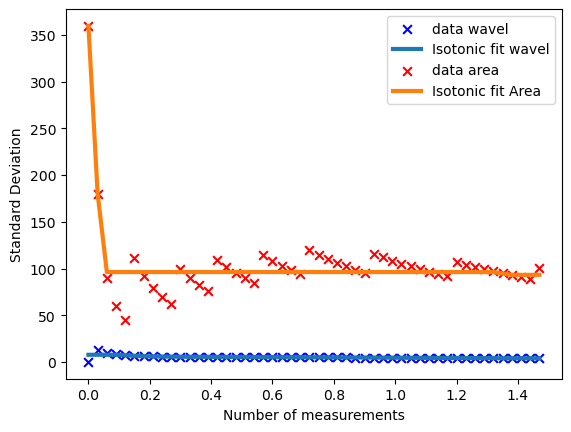

E:\solar flares/data/2017-09-06\use_nessi3.py:1797: RuntimeWarning: invalid value encountered in scalar divide
  return Delta_i / I


Not official start flare defined for CaIR15a falling back to first of TIME[0], the execpt_time b'10:34:37.966'.
The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.06\AA$.
at an intesity of 2.7453292726521973e-06. For a standard deviation of 96.20290336490811.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=0.24\AA$.
at an intesity of 4.162775198786651e-05. For a standard deviation of 5.748398273775896.



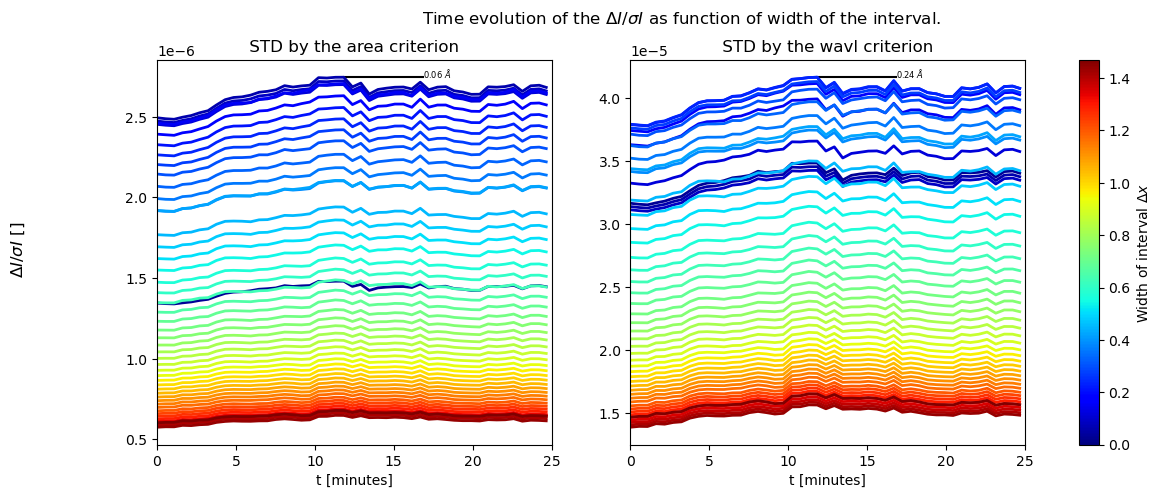

E:\solar flares/data/2017-09-06\use_nessi3.py:1967: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


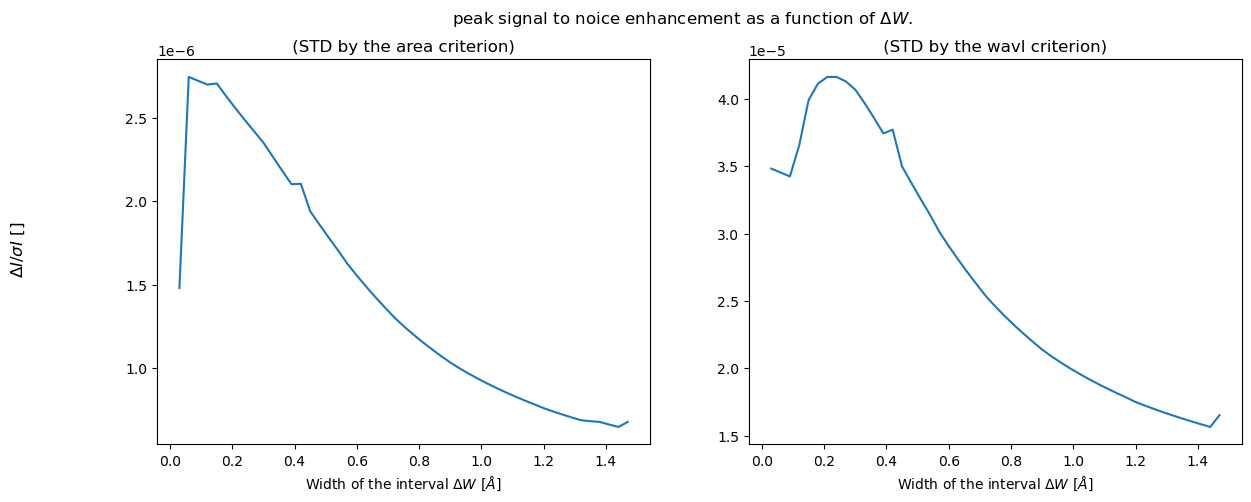

Directory 'line_data/optimal_width' already exists.


(array([[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [1.34519654e-06, 1.34181094e-06, 1.34003267e-06, ...,
         1.45198245e-06, 1.45400095e-06, 1.44527776e-06],
        [2.49400915e-06, 2.48794989e-06, 2.48465312e-06, ...,
         2.69200995e-06, 2.69559005e-06, 2.67962515e-06],
        ...,
        [5.88800061e-07, 5.91542806e-07, 5.91199362e-07, ...,
         6.33234339e-07, 6.31901363e-07, 6.28814418e-07],
        [5.75664271e-07, 5.78445526e-07, 5.78041641e-07, ...,
         6.19014543e-07, 6.17689227e-07, 6.14746800e-07],
        [6.02880396e-07, 6.05797601e-07, 6.05785108e-07, ...,
         6.47784237e-07, 6.46637890e-07, 6.43346077e-07]]),
 array([[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [3.16292780e-05, 3.15496734e-05, 3.15078613e-05, ...,
         3.41401091e-05, 3.41875697e-05, 3.39824633e-05],
        [3.13689377e-05, 

In [28]:
Deltas=np.arange(0,1.5, 0.03)
un.analyse_optimal_interval(CaIR, Deltas)

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [21] at time ['t=10:45:55 UT'].
The SST data runs from t=10:34:37 UT to t=10:59:22 UT.
The areafactor for THIS flare is 0.0011689756056305976 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 93.94%.


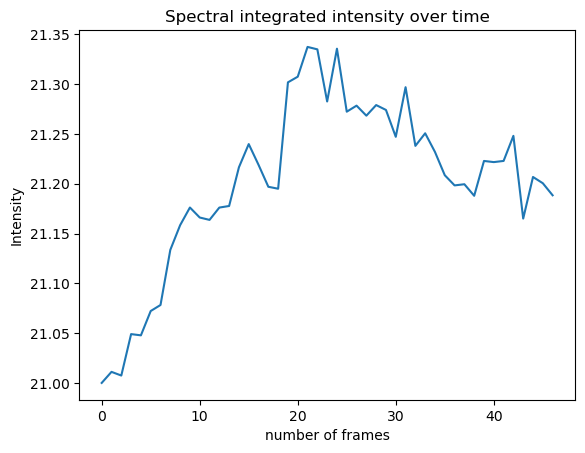

In [29]:
un.save_for_further_analysis(CaIR, theor_CaIR)


# Movie Making

[2.554574572042855e-13, 0, 1.5524108966702035]
Intensity limit calculation for first time.
Intensity limit is saved.
Frame: 0, b'10:34:37.966', total number of frames: 47 


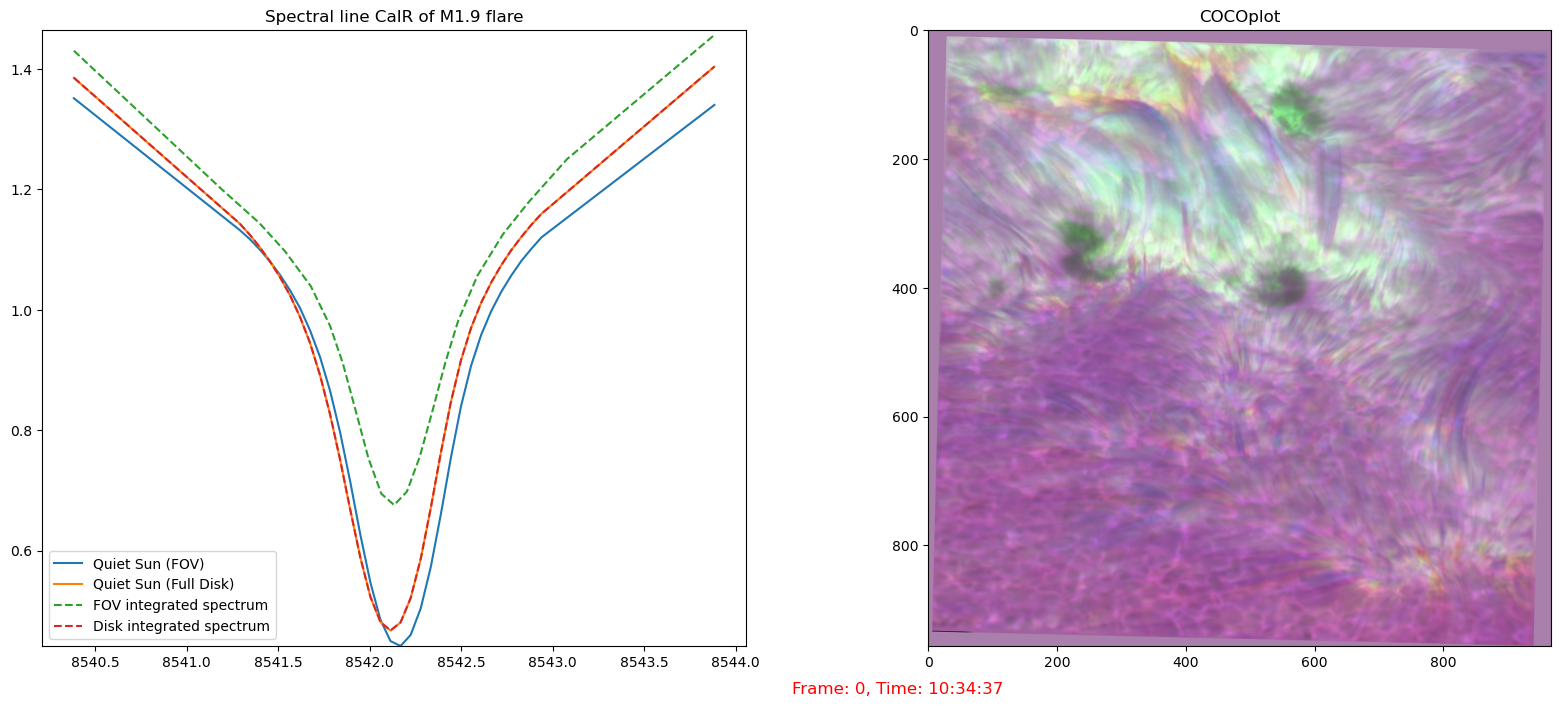

In [30]:
# fill in here all arguments
theor_line = theor_CaIR
sst_data = CaIR
name_of_flare = "M1.9"
name_of_line = "CaIR"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)
